In [7]:
pip install YOLO

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ultralytics import YOLO
model = YOLO('D:/sample_project/flowers/flowers final/Flower detection/runs/detect/train9/weights/best.pt')

In [4]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [6]:
results = model(['D:/sample_project/flowers/flowers final/flowers/rose/229488796_21ac6ee16d_n.jpg'])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Class probabilities for classification outputs


0: 480x640 3 flowers, 109.2ms
Speed: 7.1ms preprocess, 109.2ms inference, 3457.4ms postprocess per image at shape (1, 3, 480, 640)


In [8]:
img = 'D:/sample_project/flowers/flowers/daisy/25360380_1a881a5648.jpg'


0: 480x640 7 flowers, 47.9ms
Speed: 862.4ms preprocess, 47.9ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)


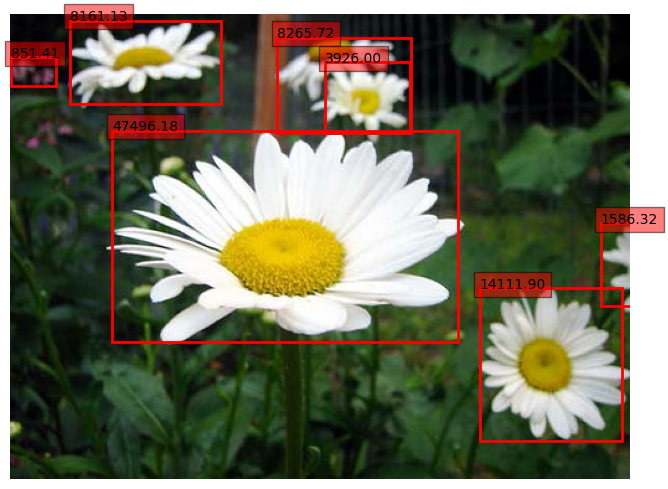

In [9]:
import torch
import cv2
import matplotlib.pyplot as plt

# Assuming you have already defined and loaded the model
results = model(['D:/sample_project/flowers/flowers/daisy/25360380_1a881a5648.jpg']) 

# Get the first result from the list (assuming only one image was processed)
result = results[0]

# Get the original image path
image_path = result.path

# Load the image using OpenCV
image = cv2.imread(image_path)

# Get the bounding boxes and their area
boxes = result.boxes
areas = (boxes.xyxy[:, 2] - boxes.xyxy[:, 0]) * (boxes.xyxy[:, 3] - boxes.xyxy[:, 1])

# Visualize the image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax = plt.gca()

# Plot each bounding box with its area as text
for box, area in zip(boxes.xyxy, areas):
    xmin, ymin, xmax, ymax = box.tolist()
    width = xmax - xmin
    height = ymax - ymin

    # Draw bounding box
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='r', linewidth=2)
    ax.add_patch(rect)

    # Add area as text inside the bounding box
    plt.text(xmin, ymin, f'{area:.2f}', bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # Turn off axis labels
plt.show()



0: 480x640 3 flowers, 47.3ms
Speed: 4.4ms preprocess, 47.3ms inference, 5.1ms postprocess per image at shape (1, 3, 480, 640)


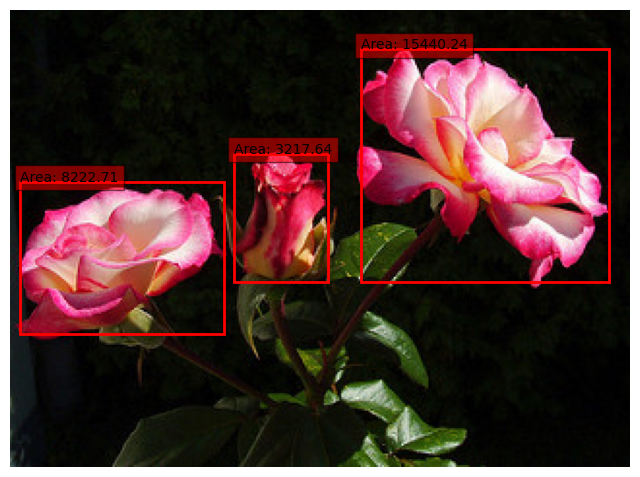

Average Area: 8960.198


In [10]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined and loaded the model
results = model(['D:/sample_project/flowers/flowers final/flowers/rose/229488796_21ac6ee16d_n.jpg']) 

# Get the first result from the list (assuming only one image was processed)
result = results[0]

# Get the original image path
image_path = result.path

# Load the image using OpenCV
image = cv2.imread(image_path)

# Get the bounding boxes and their area
boxes = result.boxes
areas = (boxes.xyxy[:, 2] - boxes.xyxy[:, 0]) * (boxes.xyxy[:, 3] - boxes.xyxy[:, 1])

# Convert the areas to a NumPy array if desired
areas_np = areas.cpu().numpy()  # If using GPU, convert to CPU and then to NumPy

# Calculate the average area
average_area = np.mean(areas_np)

# Visualize the image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax = plt.gca()

# Plot each bounding box with its area as text
for box, area in zip(boxes.xyxy, areas):
    xmin, ymin, xmax, ymax = box.tolist()
    width = xmax - xmin
    height = ymax - ymin

    # Draw bounding box
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='r', linewidth=2)
    ax.add_patch(rect)

    # Add area as text inside the bounding box
    text = f'Area: {area:.2f}'
    plt.text(xmin, ymin, text, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # Turn off axis labels
plt.show()

# Now, you can access the average area in the 'average_area' variable.
print("Average Area:", average_area)



0: 448x640 1 flower, 106.0ms
Speed: 2.0ms preprocess, 106.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


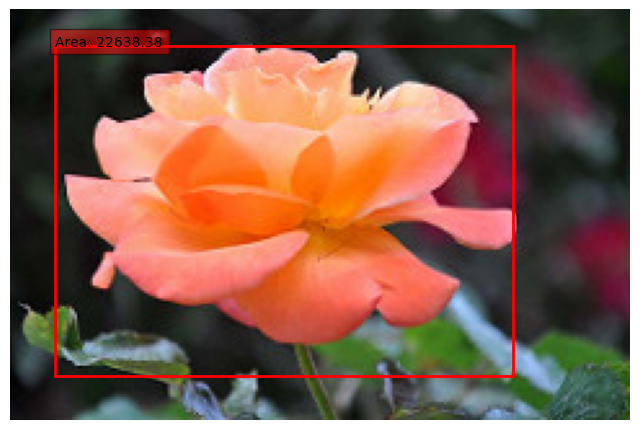

Larger Area: 22638.377


In [5]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined and loaded the model
results = model(['E:/sample_project/flowers/flowers final/test photos/5002456302_e3d2600c17_n.jpg']) 

# Get the first result from the list (assuming only one image was processed)
result = results[0]

# Get the original image path
image_path = result.path

# Load the image using OpenCV
image = cv2.imread(image_path)

# Get the bounding boxes and their area
boxes = result.boxes
areas = (boxes.xyxy[:, 2] - boxes.xyxy[:, 0]) * (boxes.xyxy[:, 3] - boxes.xyxy[:, 1])

# Convert the areas to a NumPy array if desired
areas_np = areas.cpu().numpy()  # If using GPU, convert to CPU and then to NumPy

# Calculate the larger area
larger_area = np.max(areas_np)

# Visualize the image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax = plt.gca()

# Plot each bounding box with its area as text
for box, area in zip(boxes.xyxy, areas):
    xmin, ymin, xmax, ymax = box.tolist()
    width = xmax - xmin
    height = ymax - ymin

    # Draw bounding box
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='r', linewidth=2)
    ax.add_patch(rect)

    # Add area as text inside the bounding box
    text = f'Area: {area:.2f}'
    plt.text(xmin, ymin, text, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # Turn off axis labels
plt.show()

# Now, you can access the larger area in the 'larger_area' variable.
print("Larger Area:", larger_area)
